In [29]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Load dataset
df = pd.read_csv("../Dataset/Algerian_forest_fires_cleaned.csv")

In [17]:
#View the dataset
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [19]:
#Check for null or missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

#Encode the 'Classes' column using Labelencoder
label_encoder = LabelEncoder()
df['Class_encoded']= label_encoder.fit_transform(df["Classes"])

In [23]:
#Drop original 'Classes' column
df_cleaned = df.drop(columns=['Classes'])

Data Visualization and Observations

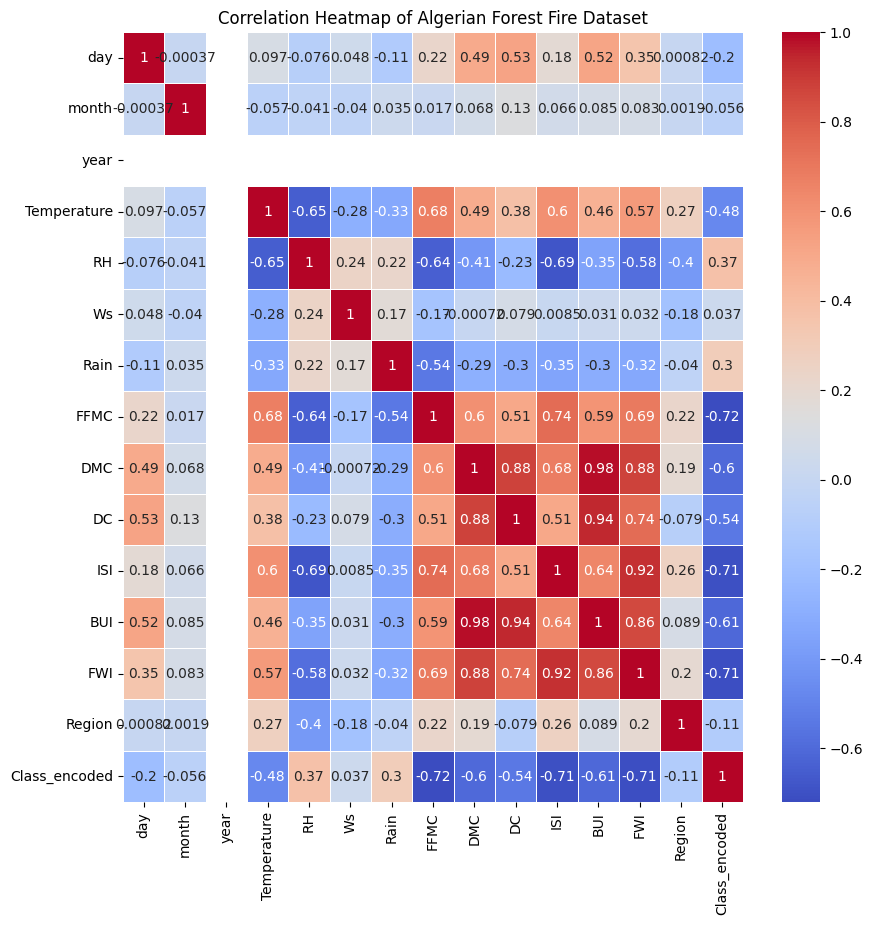

In [34]:
#Generate a correlation matrix
corr_matrix = df_cleaned.corr()

#Create a heatmap Visualization
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Algerian Forest Fire Dataset")
plt.show()

Observations
1. From the correlation heatmap, we observe that temperature and wind speed have a strong positive correlation with FWI, while humidity has negative correlation with FWI. Therefore, the higher temperatures and wind speeds increase the fire risk, while higher humdity reduces the risk.

2. Rain has a strong negative correlation with most of the other variables, indicating that higher rainfall tends to decrease the risk of forest fires.

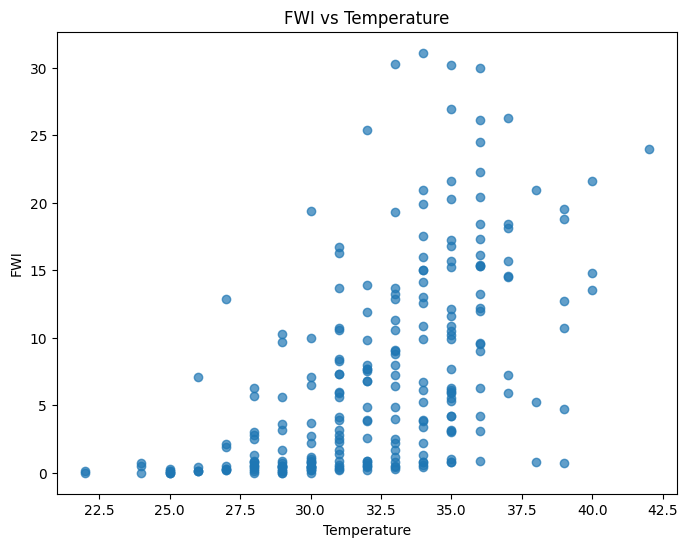

In [25]:
#Scatter plot of FWI vs Temperature

plt.figure(figsize=(8,6))
plt.scatter(df_cleaned['Temperature'], df_cleaned['FWI'], alpha= 0.7)
plt.title("FWI vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("FWI")
plt.show()

Observation:
1. As shown in scatter plot, FWI and Temperature has the positive relationship, the temperatures rise, FWI tends to increase that indicates the higher risk of forest fires during hotter weather.

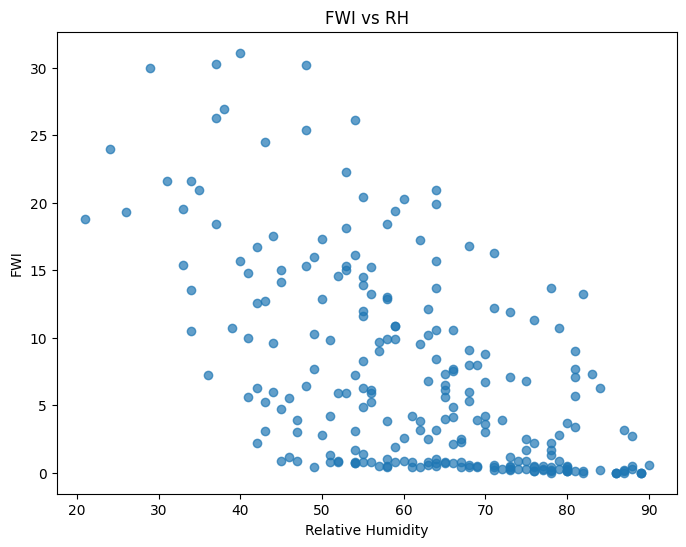

In [27]:
#Scatter plot of FWI vs Humidity

plt.figure(figsize=(8,6))
plt.scatter(df_cleaned['RH'], df_cleaned['FWI'], alpha= 0.7)
plt.title("FWI vs RH")
plt.xlabel("Relative Humidity")
plt.ylabel("FWI")
plt.show()

Observation:
The scatter plot of FWI and Humidity reveals a negative relationship, the lower humidity the higher fire risks. 

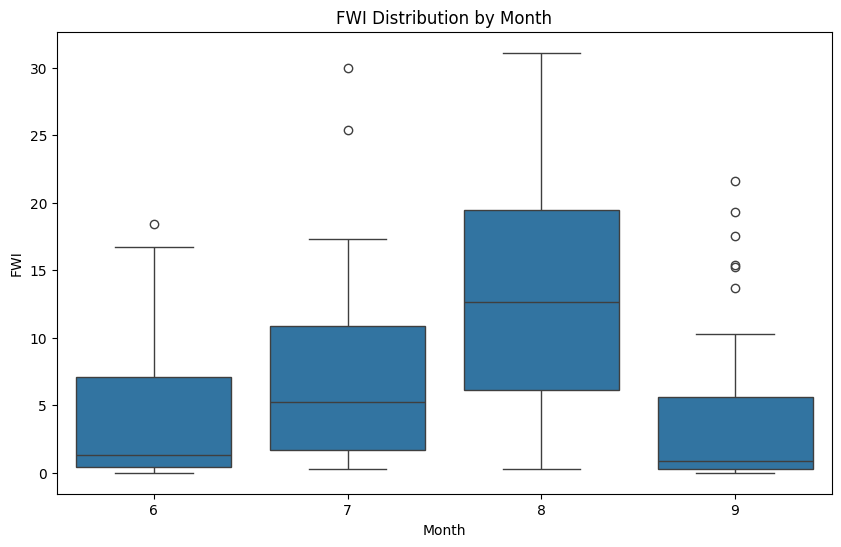

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(x="month", y="FWI", data=df_cleaned)
plt.title('FWI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('FWI')
plt.show()

Observation:
The FWI values generally increase from June (Month 6) to August (Month 8) and then decrease in September (Month 9). This suggests that the fire risk is highest during the summer months.

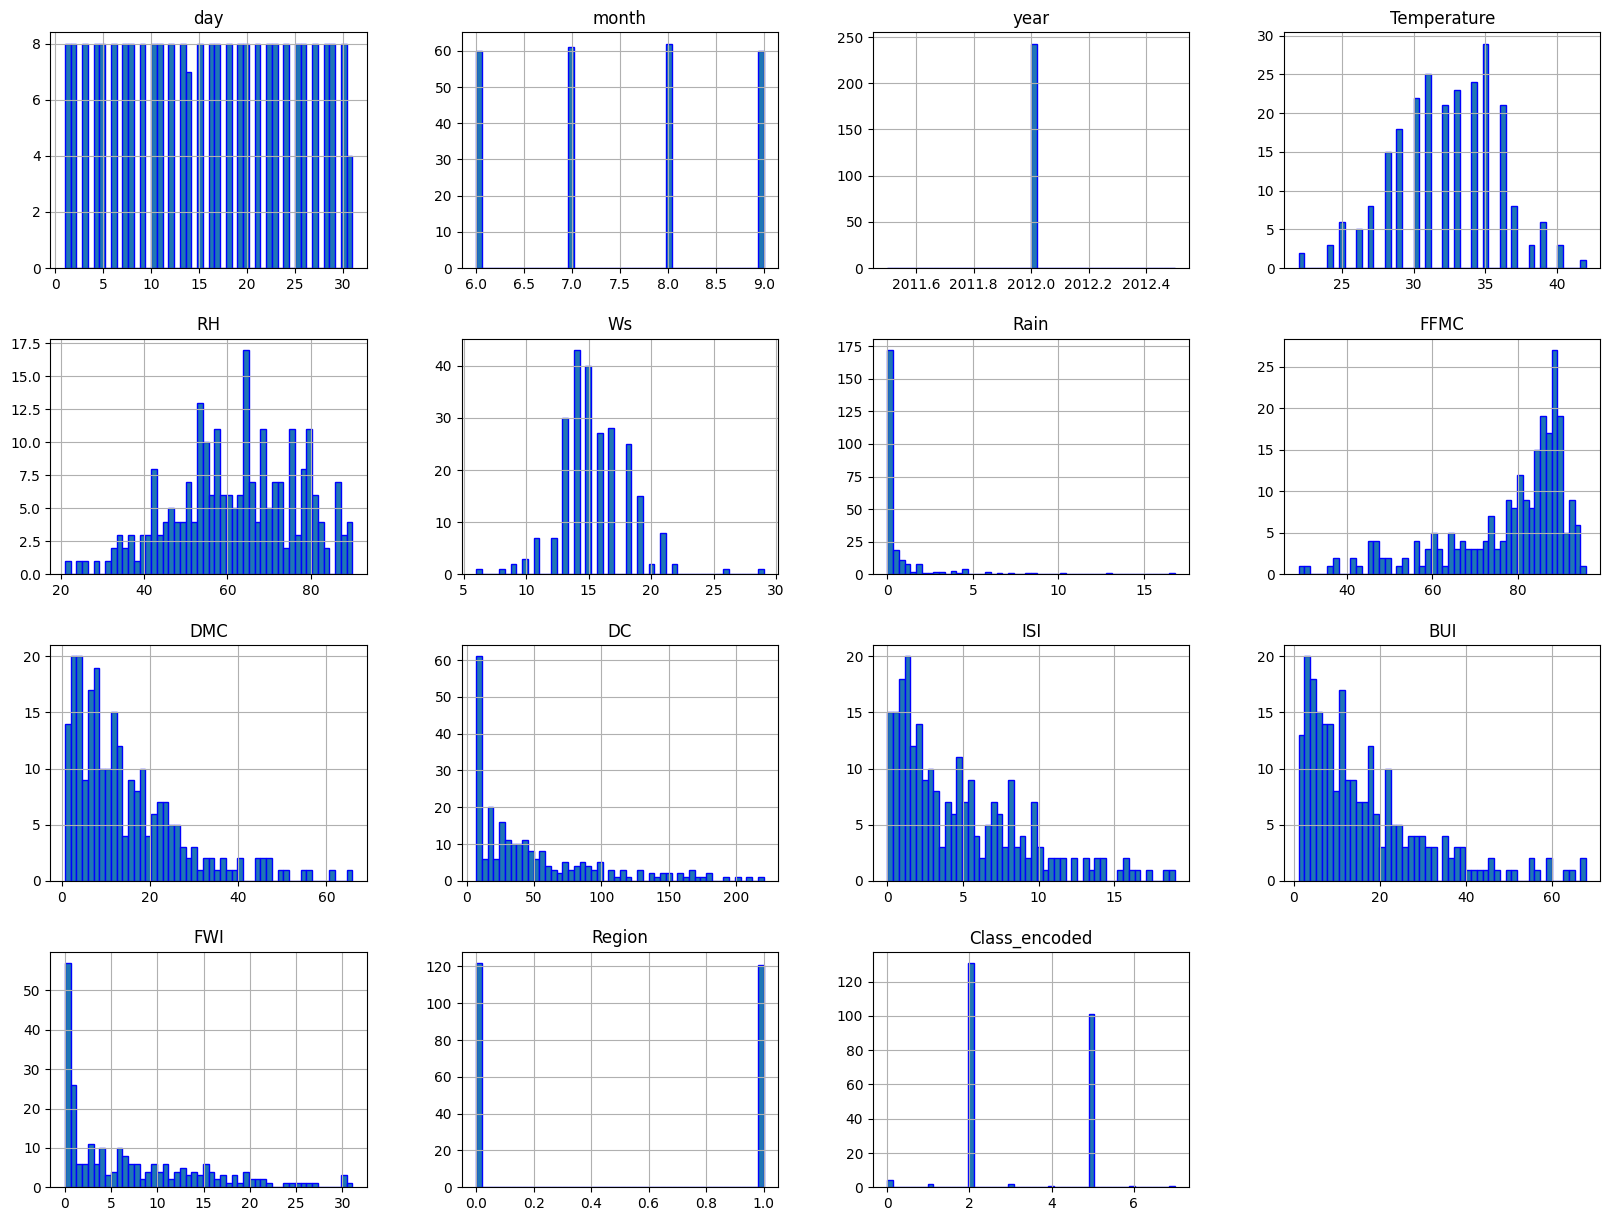

In [58]:
#Plot density plot for all features

df_cleaned.hist(bins=50, figsize= (20,15), ec='b')
plt.show()

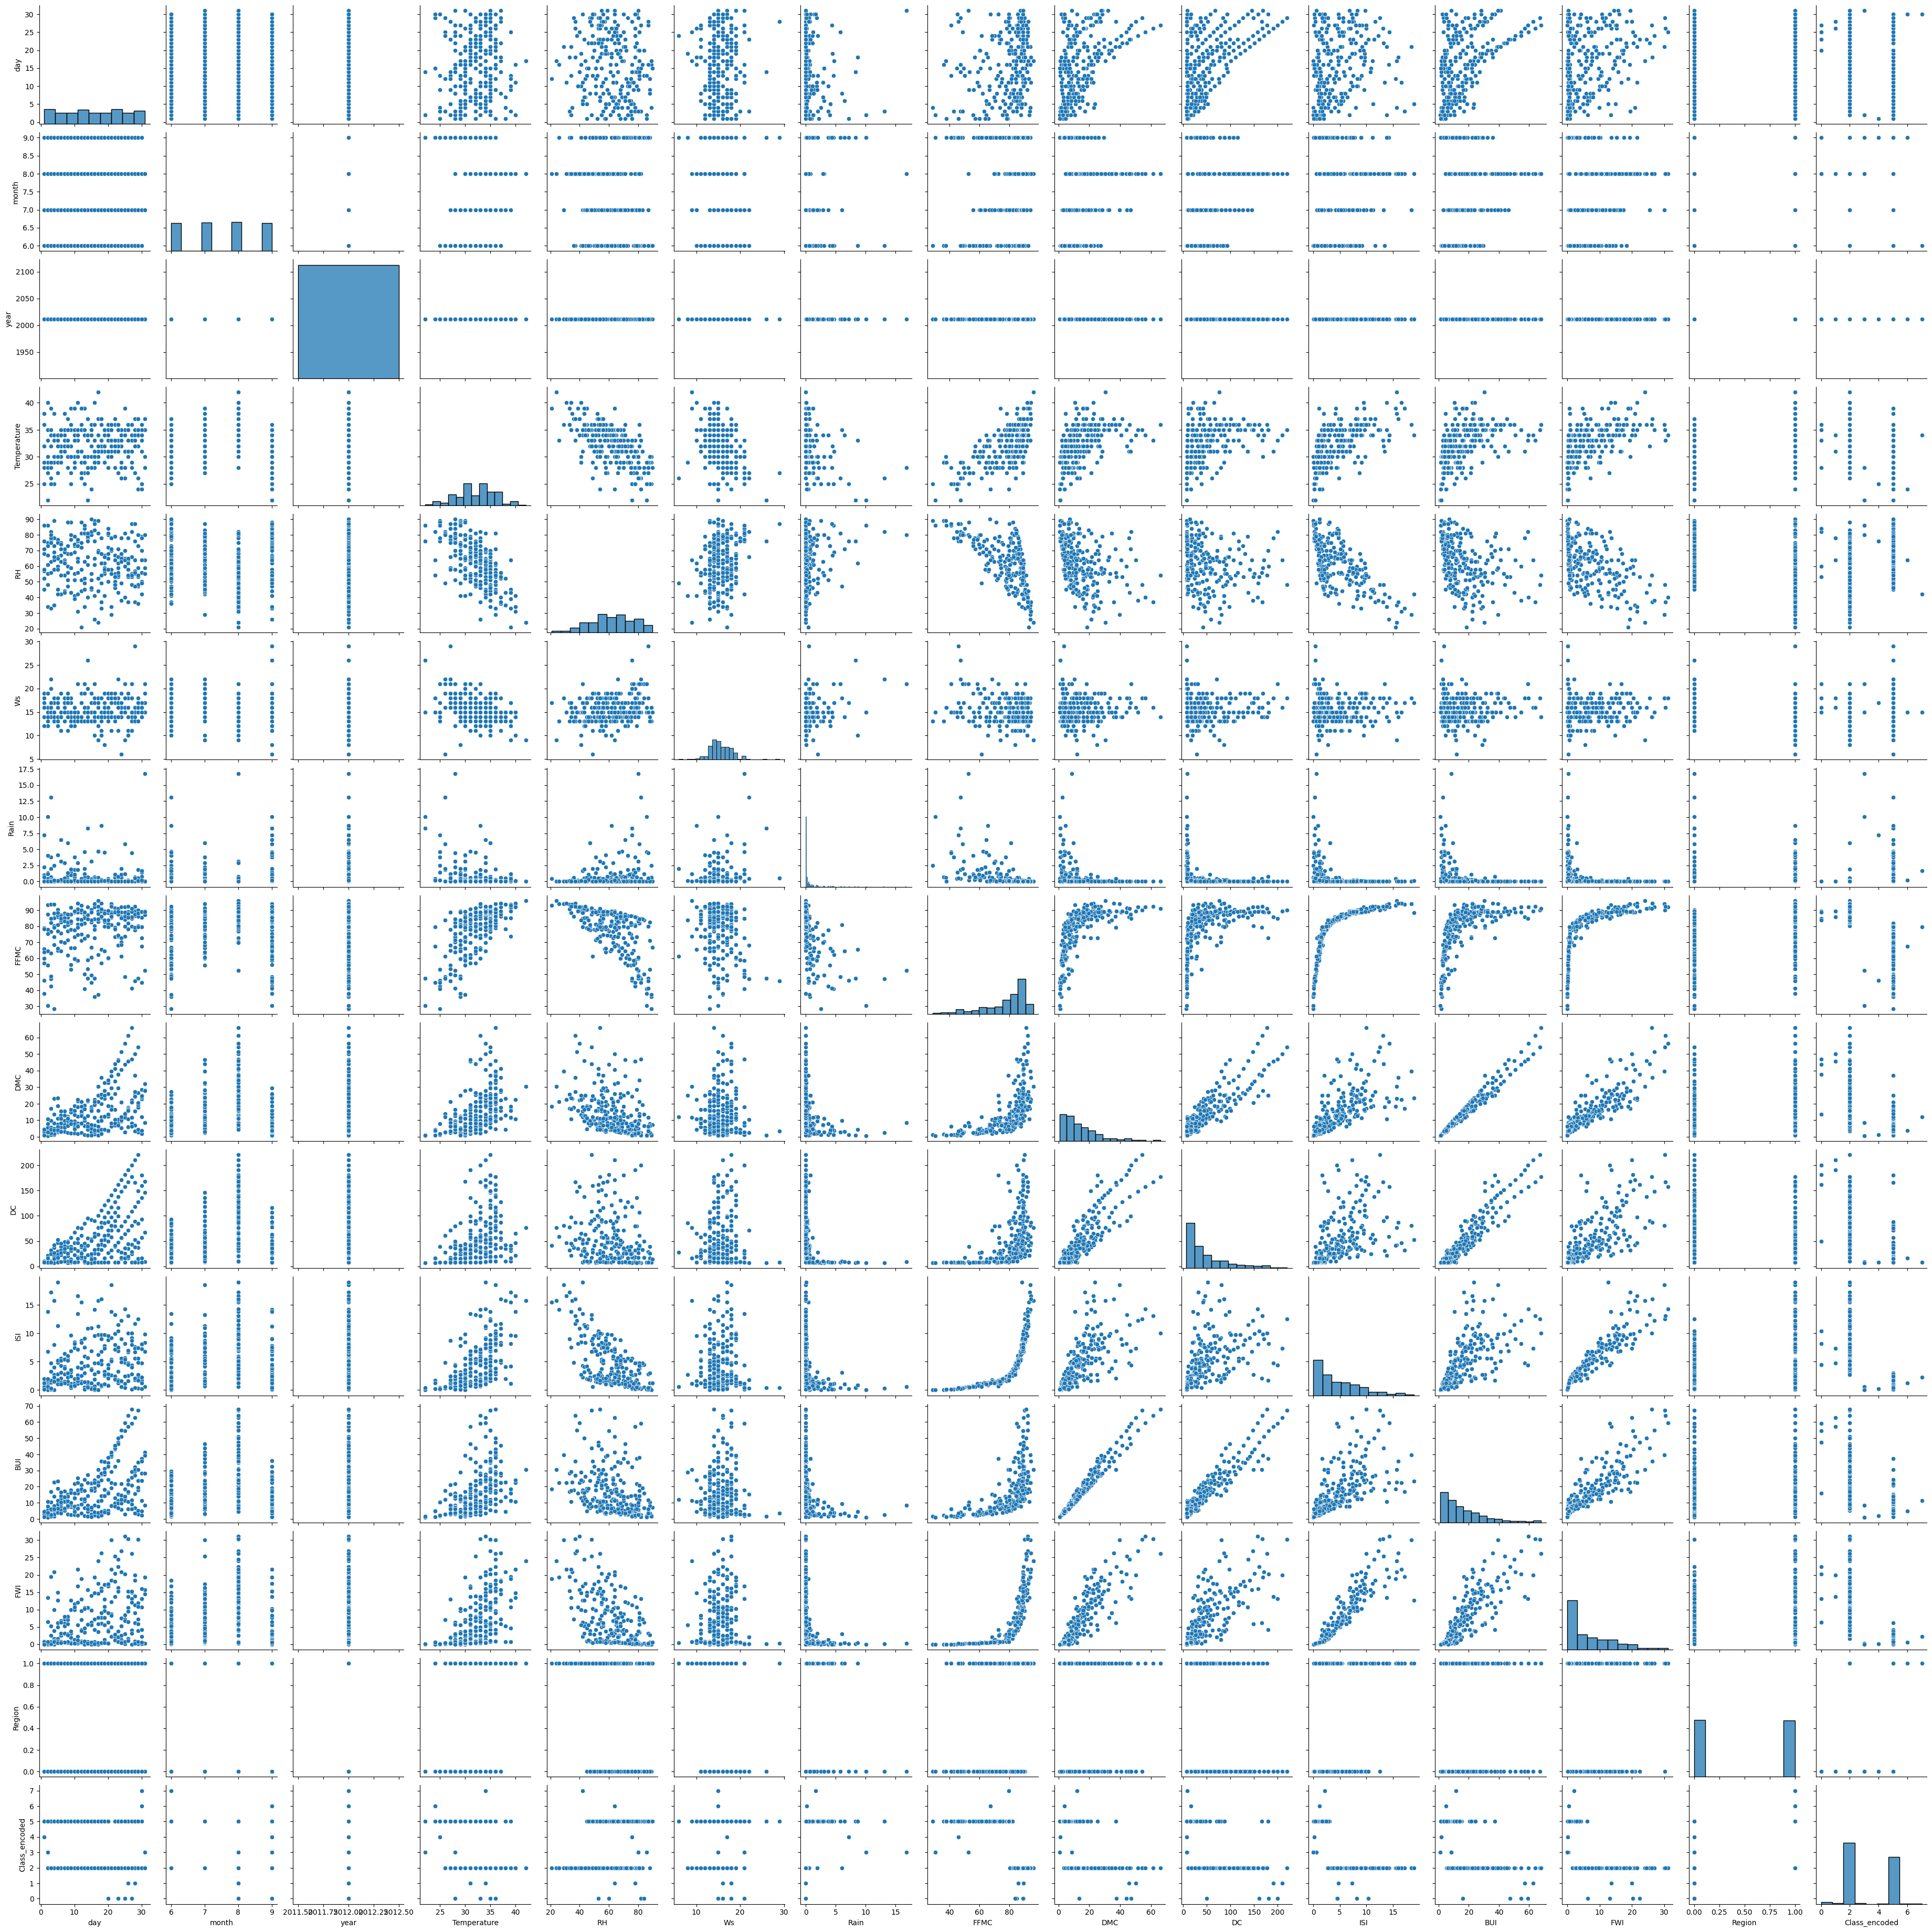

In [61]:
#Pairplot to explore relationship between different features

sns.pairplot(df_cleaned)
plt.show()

Model Development and Analysis

In [27]:
from sklearn.model_selection import train_test_split

#Defining features and target
X = df_cleaned.drop(columns=['FWI', "Class_encoded"])
y = df_cleaned['FWI']

#Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Multiple Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error

#Initialize and train the linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

#Predict on the test data
y_pred_linear = linear_reg.predict(X_test)

#Evaluate the model
mse_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression MSE: ", mse_linear)
print("R2 :", r2_linear)

Linear Regression MSE:  0.4551285782066086
R2 : 0.9876914472249017


Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Create a polynomial regression model with degree 2
poly_model = make_pipeline(PolynomialFeatures(degree= 2), LinearRegression())
poly_model.fit(X_train, y_train)

#Predict on the test data
y_pred_poly = poly_model.predict(X_test)

#Evaluate the model
mse_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polymonial Regression MSE: ",mse_poly )
print("R2 :", r2_poly)

Polymonial Regression MSE:  0.40802791578010944
R2 : 0.970958657591273


Regularization (Ridge and Lasso)

In [50]:
from sklearn.linear_model import Ridge, Lasso

#Regularization using Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#Regularization using Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression MSE: ", mse_ridge)
print("R2 :", r2_ridge)

print("Lasso Regression MSE: ", mse_lasso)
print("R2 :", r2_lasso)


Ridge Regression MSE:  0.3753784785453601
R2 : 0.9876147136644425
Lasso Regression MSE:  0.43125511057921717
R2 : 0.9857711128008884


Cross-Validation and Hyperparameter Tuning

In [46]:
from sklearn.model_selection import cross_val_score, GridSearchCV

#Hyperparameter tuning for Ridge
ridge_param ={'alpha': [0.1, 1.0,10.0,100,101]}
grid_ridge = GridSearchCV(Ridge(), ridge_param, cv=5)
grid_ridge.fit(X_train, y_train)

#Cross-validation for Ridge
best_ridge = grid_ridge.best_estimator_
cv_score_ridge =cross_val_score(best_ridge, X_train, y_train, cv=5)

print("Best Ridge Alpha: ", grid_ridge.best_params_)
print("Best CV Score: ", grid_ridge.best_score_)

Best Ridge Alpha:  {'alpha': 100}
Best CV Score:  0.9568108070341982


Model Evaluation

In [54]:
#Predict on the test data for Ridge
y_pred = best_ridge.predict(X_test)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.5811487005300578
Mean Squared Error (MSE): 0.6791538062526504
Root Mean Squared Error (RMSE): 0.8241078850809829
R-squared (R2): 0.977591910998951


Saving the Trained Model as Pickle file

In [56]:
import pickle

#Save the trained Model
with open("best_ridge_model.pkl", "wb") as f:
    pickle.dump(best_ridge, f)

Testing on Unseen Data